In [1]:
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
finalResults = pandas.read_excel('qualifier-final.xlsx', sheet_name='final')
#df_final.describe()

In [3]:
qualifiedON = pandas.read_excel('nom-name.xlsx', sheet_name='ON')

In [69]:
qualifiedON.describe()
qualifiedON.head()

,id,Location,Gender,Contact.Instructions,Qualifier..Location,City,Province,Sport.prior.to.RBC.TG,Bobsleigh..Skeleton,Cycling,...,Canoe.Kayak,Judo,Triathlon,Ski.Cross,Water.Polo,Freestyle.,Athletics,NSO.Contacted.Athlete.,Currently.in.NSO.Program.,Comments
0,444,TORONTO,F,NaN,Milton,Peterborough,Ontario,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,235,TORONTO,M,NaN,Milton,Sudbury,Ontario,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,270,TORONTO,F,NaN,Kingston,South Woodslee,Ontario,NaN,Y,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN
3,231,TORONTO,M,NaN,Toronto,Toronto,Ontario,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,248,TORONTO,M,NaN,Kingston,Kingston,Ontario,NaN,Y,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN


In [5]:
qualifiedON.head()

,id,Location,Gender,Contact.Instructions,Qualifier..Location,City,Province,Sport.prior.to.RBC.TG,Bobsleigh..Skeleton,Cycling,...,Canoe.Kayak,Judo,Triathlon,Ski.Cross,Water.Polo,Freestyle.,Athletics,NSO.Contacted.Athlete.,Currently.in.NSO.Program.,Comments
0,444,TORONTO,F,NaN,Milton,Peterborough,Ontario,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,235,TORONTO,M,NaN,Milton,Sudbury,Ontario,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,270,TORONTO,F,NaN,Kingston,South Woodslee,Ontario,NaN,Y,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN
3,231,TORONTO,M,NaN,Toronto,Toronto,Ontario,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,248,TORONTO,M,NaN,Kingston,Kingston,Ontario,NaN,Y,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN


In [6]:
finalResults[finalResults['id'] == 444]

,id,LOCATION,AGE,HEIGHT,WEIGHT,WINGSPAN,X0.10M,X0.30M,X0.40M,X30.40M,...,TRIPLE.BROAD.JUMP.1,SINGLE.BROAD.JUMP.1,ABSOLUTE.6SEC.PEAK.POWER.1,RELATIVE.6SEC.PEAK.POWER.1,UB.PUSH.1,UB.PULL.1,LB.PUSH.1,CONCEPT.TOTAL.1,ARM.LEG.BIKE.1,CUMULATIVE..PHYSICAL.TESTS.
443,444,Toronto,15.526027,180.0,77.75,185.4,2.1,5.1,6.57,1.47,...,-1.2746,-1.151628,0.751441,-0.490673,-0.698352,-0.212278,0.248303,-0.113735,0.046841,-0.688715


In [7]:
ages = finalResults.AGE
ages.describe()

count    447.000000
mean      18.605231
std        3.573086
min        0.000000
25%       16.134932
50%       18.000000
75%       21.000000
max       29.000000
Name: AGE, dtype: float64

Text(0.5,1,'Ages for 447 Athletes')

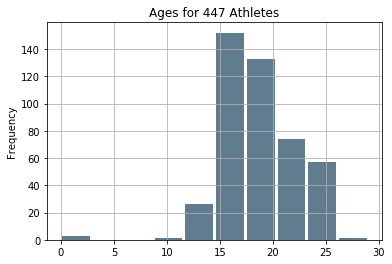

In [8]:
ages.plot.hist(grid=True, bins=10, rwidth=0.9, color='#607c8e')
plt.title('Ages for 447 Athletes')

In [9]:
#Find where ages are 0, indicating no value
ages.T[ages.T == 0]

46     0.0
262    0.0
436    0.0
Name: AGE, dtype: float64

We see there are only 3 rows where the athlete's age is not listed. For now let's remove those rows to create an accurate histogram.

In [10]:
ages = ages.T[ages.T != 0]
ages.describe()

count    444.000000
mean      18.730942
std        3.239351
min       11.000000
25%       16.194521
50%       18.000000
75%       21.000000
max       29.000000
Name: AGE, dtype: float64

(10, 30)

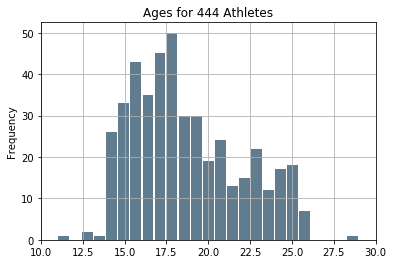

In [43]:
ages.plot.hist(grid=True, bins=25, rwidth=0.9, color='#607c8e')
plt.title('Ages for 444 Athletes')
plt.xlim(10,30)

What about the ages of athletes that qualified from Ontario?

In [12]:
qualifiedResultsON = finalResults[finalResults.id.isin(qualifiedON.id)]

In [45]:
agesQlfd = qualifiedResultsON.AGE
agesQlfd.describe()

count    75.000000
mean     19.101699
std       3.218569
min      13.942466
25%      16.535616
50%      18.252055
75%      22.086301
max      25.671233
Name: AGE, dtype: float64

(10, 30)

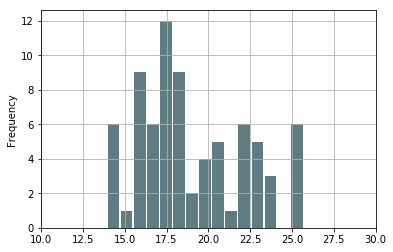

In [42]:
agesQlfd.plot.hist(grid=True, bins=15, rwidth=0.9, color='#607c83')
plt.xlim(10,30)

Interestingly, this looks less like a shifted Gaussian. The ages that qualify are not directly related to the ages that try out.

### Height and Weight
Let's take a look at the height and weight distributions. 

In [36]:
height = finalResults.HEIGHT
height.describe()

count    452.000000
mean     175.150553
std        9.855353
min      148.500000
25%      168.000000
50%      175.000000
75%      181.500000
max      202.500000
Name: HEIGHT, dtype: float64

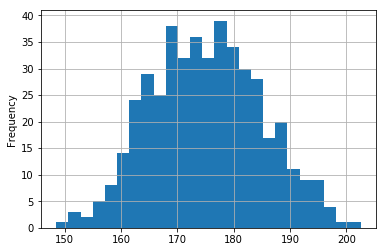

In [44]:
height.plot.hist(grid=True, bins=25)

Now let's take a look at the height distribution of qualified athletes in Ontario

In [47]:
heightQlfd = qualifiedResultsON.HEIGHT
heightQlfd.describe()

count     75.000000
mean     178.095333
std        9.374355
min      160.500000
25%      171.000000
50%      177.000000
75%      183.500000
max      202.500000
Name: HEIGHT, dtype: float64

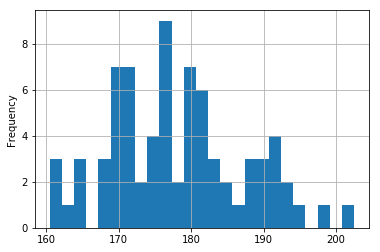

In [52]:
heightQlfd.plot.hist(grid=True, bins=25)

We once again see that the heights of athletes do not follow the distribution of the overall results. 

In [53]:
weight = finalResults.WEIGHT
weight.describe()

count    453.000000
mean      71.113510
std       13.395978
min       38.400000
25%       61.700000
50%       70.600000
75%       79.200000
max      133.600000
Name: WEIGHT, dtype: float64

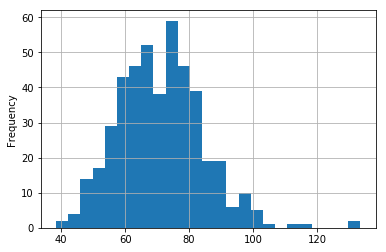

In [60]:
weight.plot.hist(grid=True, bins=25)

In [63]:
weightQlfdON = qualifiedResultsON.WEIGHT
weightQlfdON.describe()

count     75.000000
mean      74.960667
std       12.272044
min       48.500000
25%       66.875000
50%       73.400000
75%       81.925000
max      102.900000
Name: WEIGHT, dtype: float64

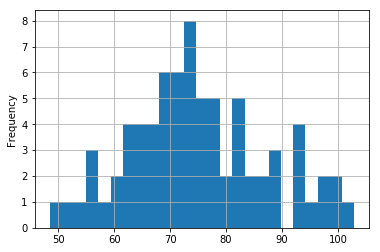

In [68]:
weightQlfdON.plot.hist(grid=True, bins=25)

The weight distribution seems much more like a Gaussian than the previous metrics. And apart from a few outliers, shows similar results to the overall distribution.